# Importing Librariers

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


# Importing the dataset

In [2]:
dataset = pd.read_csv('/Users/shailendrapatil/Fall2017/Machine Learning A-Z Template Folder/Part 2 - Regression/Section 6 - Polynomial Regression/Position_Salaries.csv')

In [3]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [5]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values


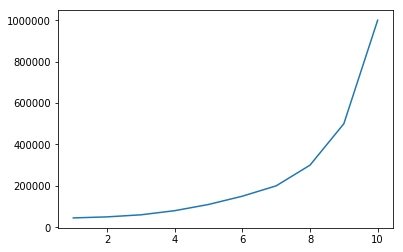

In [6]:
plt.plot(X,y)

This definitely isnt a linaer relation, hence we go for polynomial regression. Lets fit both Linear Regression and Polynomial and then compare

#  Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lin_reg=LinearRegression()
lin_reg.fit(X,y)

/Users/shailendrapatil/anaconda/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Create Polynomial Feature class to convert X to polynomial

# Polynomial Regression

In [9]:
from sklearn.preprocessing import PolynomialFeatures

In [10]:
poly_reg = PolynomialFeatures(degree=2)

In [11]:
X_poly = poly_reg.fit_transform(X)

In [12]:
lin_reg2=LinearRegression()
lin_reg2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Visualizing Linear Regression Results

Text(0,0.5,'Salary')

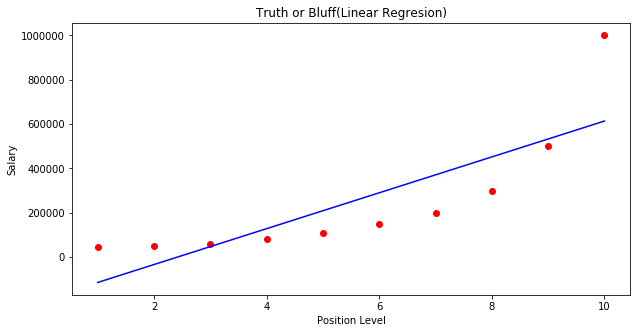

In [13]:
plt.figure(figsize=(10,5))
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg.predict(X),color='blue')
plt.title('Truth or Bluff(Linear Regresion)')
plt.xlabel('Position Level')
plt.ylabel('Salary')


# Visualizing Polynomial Regression Results

Text(0,0.5,'Salary')

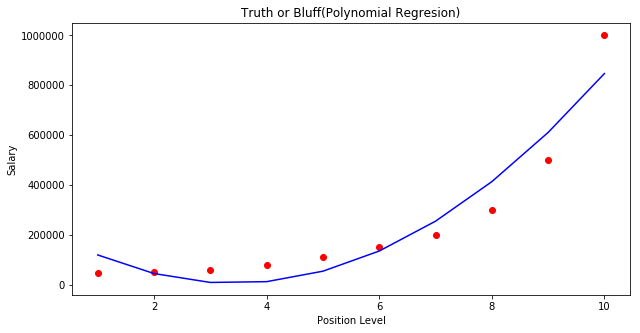

In [14]:
plt.figure(figsize=(10,5))
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg2.predict(X_poly),color='blue')
plt.title('Truth or Bluff(Polynomial Regresion)')
plt.xlabel('Position Level')
plt.ylabel('Salary')


# Degree 3 

In [18]:
poly_reg=PolynomialFeatures(degree=3)
X_poly=poly_reg.fit_transform(X)
lin_reg2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Text(0,0.5,'Salary')

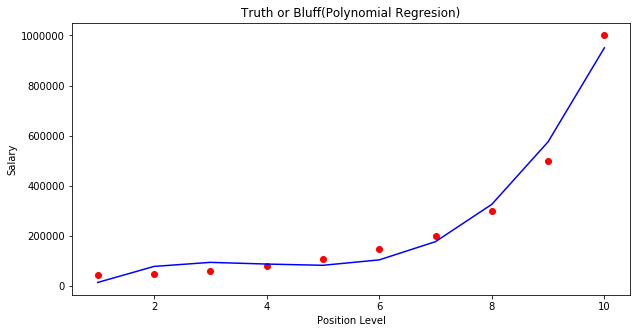

In [22]:
plt.figure(figsize=(10,5))
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg2.predict(X_poly),color='blue')
plt.title('Truth or Bluff(Polynomial Regresion)')
plt.xlabel('Position Level')
plt.ylabel('Salary')


In [23]:
import statsmodels.formula.api as sm
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    print(regressor_OLS.summary())
    return x
 
SL = 0.05
X_backward = X_poly[:, [0, 1, 2, 3]]
X_Modeled = backwardElimination(X_backward, SL)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     172.6
Date:                Sat, 14 Apr 2018   Prob (F-statistic):           6.35e-07
Time:                        15:22:05   Log-Likelihood:                -121.03
No. Observations:                  10   AIC:                             248.1
Df Residuals:                       7   BIC:                             249.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          9.566e+04    2.7e+04      3.545      0.0

/Users/shailendrapatil/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


# Degree 4

In [29]:
poly_reg=PolynomialFeatures(degree=4)
X_poly=poly_reg.fit_transform(X)
lin_reg2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Text(0,0.5,'Salary')

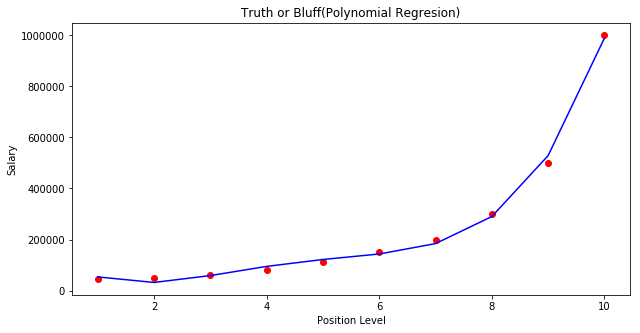

In [30]:
plt.figure(figsize=(10,5))
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg2.predict(X_poly),color='blue')
plt.title('Truth or Bluff(Polynomial Regresion)')
plt.xlabel('Position Level')
plt.ylabel('Salary')


In [28]:
import statsmodels.formula.api as sm
def backwardElimination(x, SL):
    numVars = len(x[0])
    temp = np.zeros((50,6)).astype(int)
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        adjR_before = regressor_OLS.rsquared_adj.astype(float)
        if maxVar > SL:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    temp[:,j] = x[:, j]
                    x = np.delete(x, j, 1)
                    tmp_regressor = sm.OLS(y, x).fit()
                    adjR_after = tmp_regressor.rsquared_adj.astype(float)
                    if (adjR_before >= adjR_after):
                        x_rollback = np.hstack((x, temp[:,[0,j]]))
                        x_rollback = np.delete(x_rollback, j, 1)
                        print (regressor_OLS.summary())
                        return x_rollback
                    else:
                        continue
    regressor_OLS.summary()
    return x
 
SL = 0.05
X_opt = X_poly[:, [0, 1, 2, 3, 4]]
X_Modeled = backwardElimination(X_opt, SL)

/Users/shailendrapatil/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))
